# Wuroboki - NiHSA

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import xarray as xr

from src.datasources import nihsa, glofas

In [3]:
df_nh = nihsa.load_wuroboki()
df_nh

,time,level
2,1954-05-25,398.0
3,1954-05-26,383.0
4,1954-05-27,389.0
5,1954-05-28,408.0
6,1954-05-29,404.0
...,...,...
27234,2024-12-27,458.0
27235,2024-12-28,455.0
27236,2024-12-29,451.0
27237,2024-12-30,457.0


In [4]:
df_nh.sort_values("level")

,time,level
3189,1966-04-11,27.0
3188,1966-04-10,29.0
3190,1966-04-12,29.0
1997,1962-02-24,30.0
3187,1966-04-09,30.0
...,...,...
26250,2021-06-15,793.0
26262,2021-06-27,794.0
26263,2021-06-28,813.0
26264,2021-06-29,816.0


In [8]:
df_nh.loc[df_nh[df_nh["time"].dt.year == 2022]["level"].idxmax()]

time     2022-11-02 00:00:00
level                  530.0
Name: 26448, dtype: object

In [10]:
df_nh.groupby(df_nh["time"].dt.year)["level"].max().reset_index().sort_values(
    "level"
)

,time,level
26,1980,126.0
39,2007,213.0
29,1987,216.0
35,1994,284.0
36,1996,325.0
40,2008,326.2
46,2017,368.0
41,2009,397.8
27,1982,416.0
42,2010,426.0


In [31]:
df_nh["level_change"] = df_nh["level"] - df_nh["level"].shift()

In [32]:
df_plot = df_nh[df_nh["time"].dt.year >= 1979].copy()
df_plot["year"] = df_plot["time"].dt.year

In [33]:
n_years = df_plot["year"].nunique()

In [34]:
n_years

29

In [39]:
df_plot["level_change"].min()

-395.0

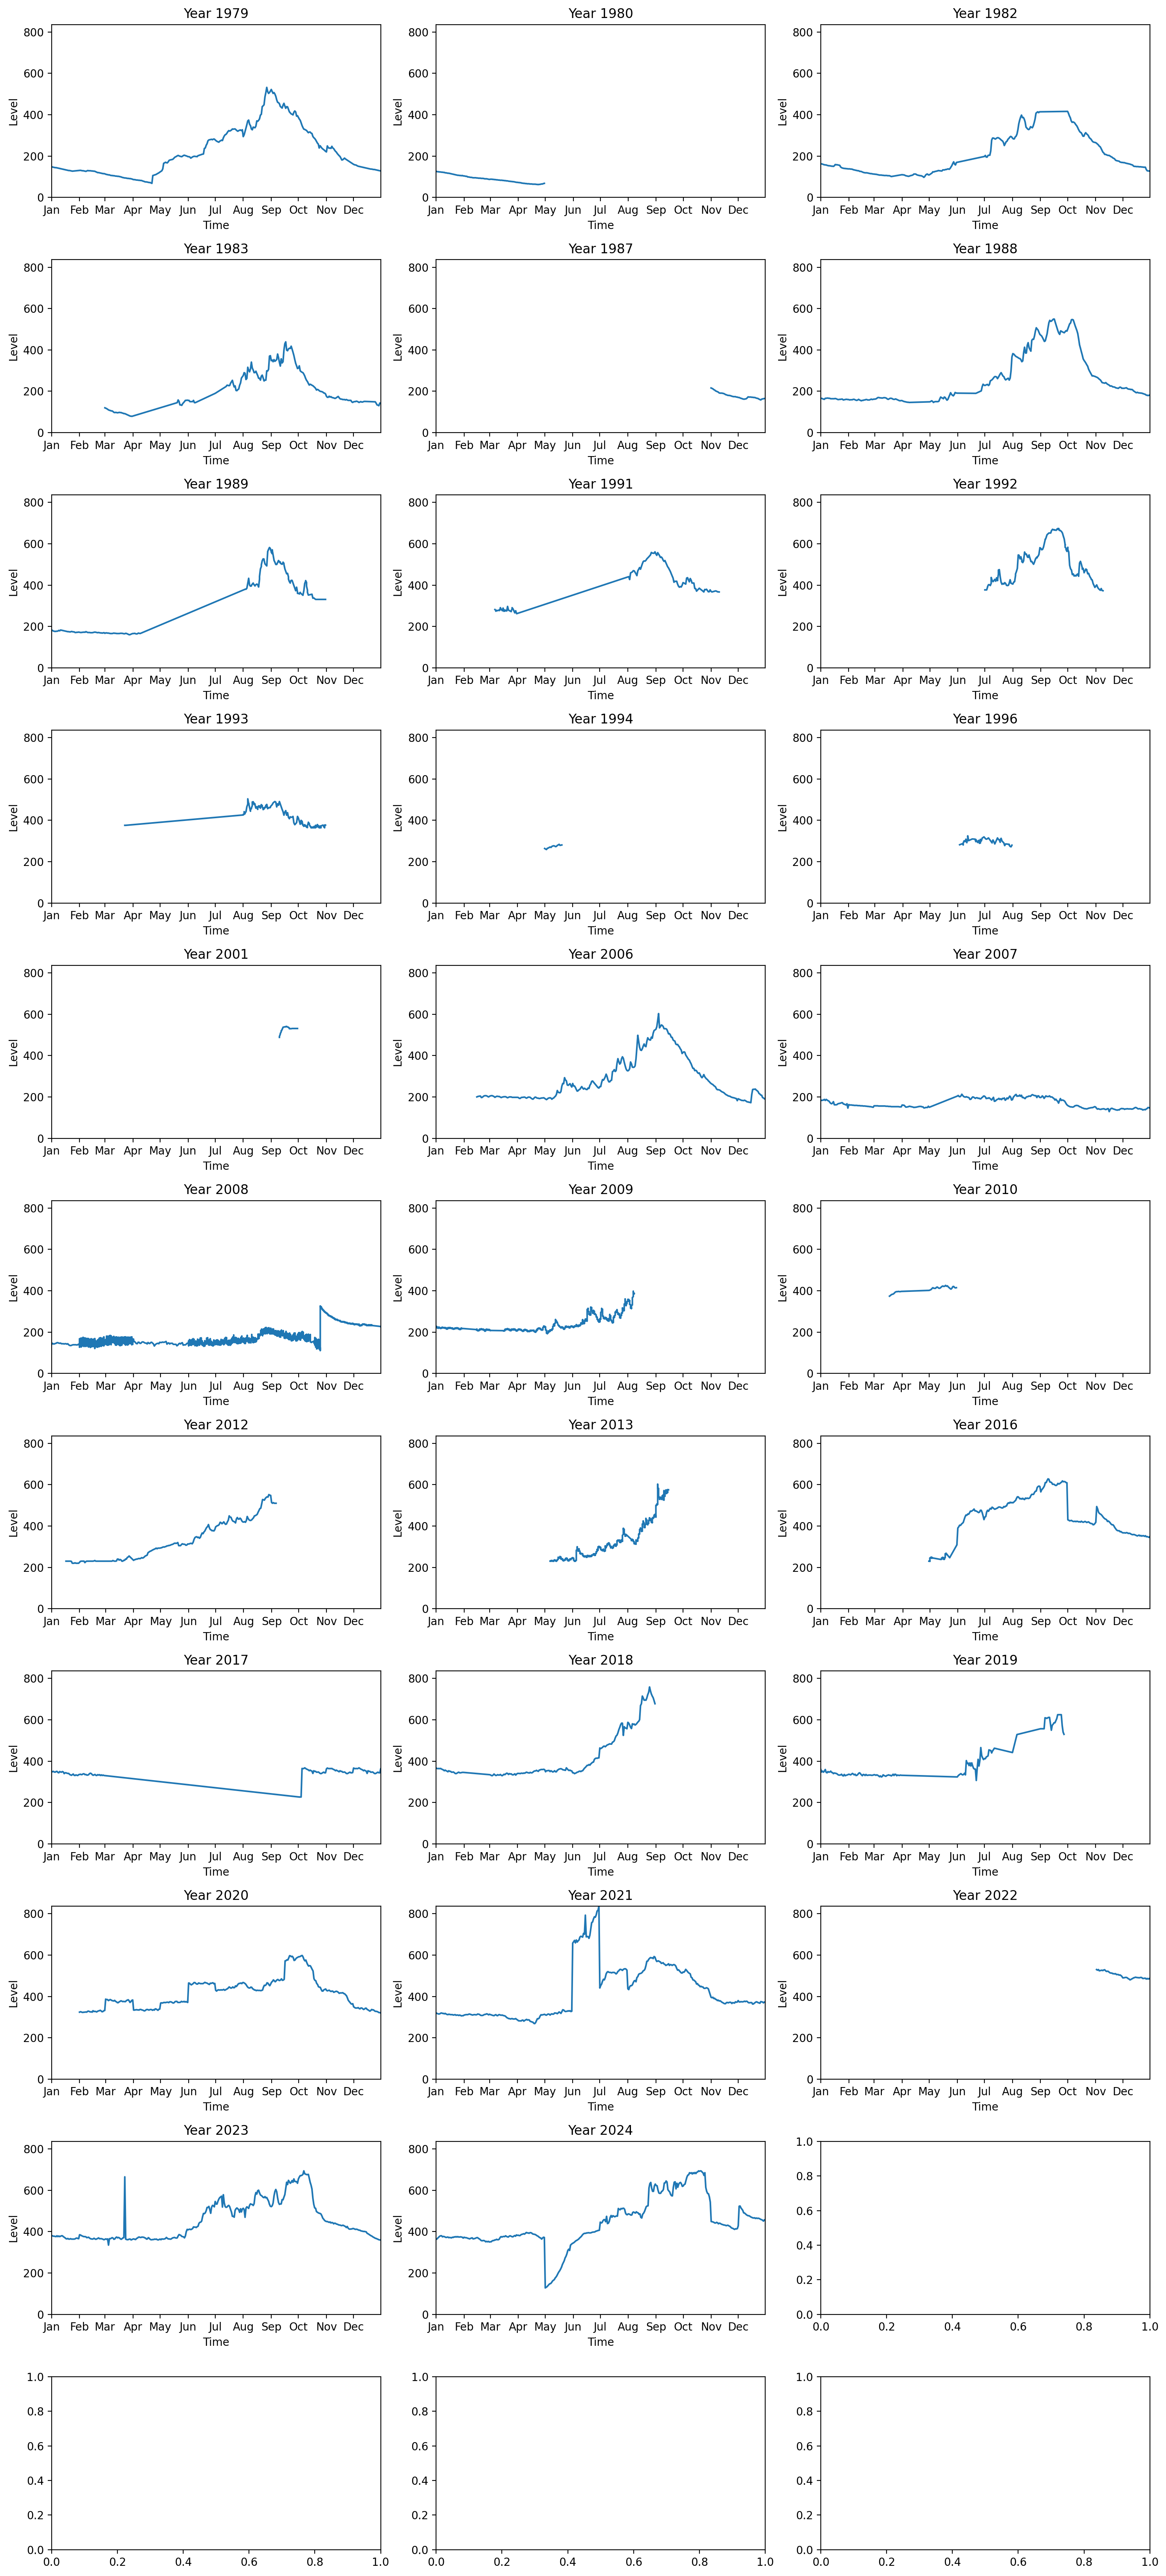

In [43]:
plot_col = "level"

ymax = df_plot[plot_col].max()
ymin = min(0, df_plot[plot_col].min())

ncols = 3
nrows = round(n_years / ncols) + 1

fig, axes = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 3), dpi=200
)
axes = axes.flatten()  # Flatten axes array for easy indexing

# Loop through each year and plot in corresponding subplot
for i, year in enumerate(df_plot["year"].unique()):
    ax = axes[i]
    year_data = df_plot[df_plot["year"] == year]

    # Plot the data
    ax.plot(year_data["time"], year_data[plot_col])  # Adjust 'level' as needed
    ax.set_title(f"Year {year}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Level")

    # Set the y-axis to range from 0 to the maximum value
    ax.set_ylim(ymin, ymax)

    # Set x-axis to span from Jan 1 to Dec 31 for each year
    start_date = pd.Timestamp(f"{year}-01-01")
    end_date = pd.Timestamp(f"{year}-12-31")
    ax.set_xlim(start_date, end_date)

    # Format x-axis to show months/days (e.g., Jan 01, Feb 01, etc.)
    ax.xaxis.set_major_locator(
        mdates.MonthLocator()
    )  # Show major ticks for each month
    ax.xaxis.set_major_formatter(
        mdates.DateFormatter("%b")
    )  # Month and day format

# Adjust layout and display
plt.tight_layout()
plt.show()

In [28]:
df_nh

,time,level,level_change
2,1954-05-25,398.0,NaN
3,1954-05-26,383.0,-15.0
4,1954-05-27,389.0,6.0
5,1954-05-28,408.0,19.0
6,1954-05-29,404.0,-4.0
...,...,...,...
27234,2024-12-27,458.0,-1.0
27235,2024-12-28,455.0,-3.0
27236,2024-12-29,451.0,-4.0
27237,2024-12-30,457.0,6.0


<Axes: xlabel='time'>

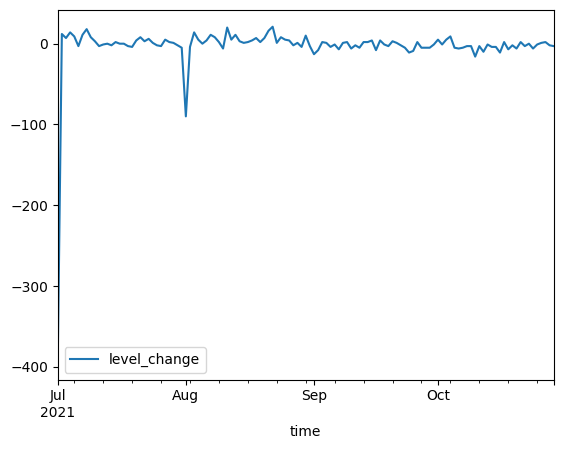

In [30]:
year = 2021
months = range(7, 11)
df_nh[
    (df_nh["time"].dt.year == year) & (df_nh["time"].dt.month.isin(months))
].plot(x="time", y="level_change")